In [1]:
exec(open("init_notebook.py").read())

current working dirC:\Users\adhocmaster\Documents\GitHub\junction-art


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import junctionart.extensions as extensions, os, dill
import numpy as np
import pyodrx as pyodrx
import logging
from junctionart.library.Configuration import Configuration
from junctionart.junctions.SequentialJunctionBuilder import SequentialJunctionBuilder
from junctionart.junctions.LaneConfiguration import LaneConfigurationStrategies
from junctionart.junctions.IntersectionValidator import IntersectionValidator
from analysis.metrics.travel.ConnectionRoadComplexity import ConnectionRoadComplexity
from analysis.metrics.MetricManager import MetricManager

from analysis.core.Histogram import Histogram
from analysis.core.ScatterPlot import ScatterPlot

from analysis.core.MetricsPlotter import MetricsPlotter
import seaborn as sns

from tqdm import tqdm

logging.basicConfig(level=logging.ERROR)


# Collecting Metrics from Intersection Objects

In [5]:
def loadIntersections(path):
    intersections = None
    with open(path, 'rb') as handler:
        intersections = dill.load(handler)
    return intersections

In [16]:
# path = "output/Sequential-intersections-3way-3000.dilll"
# path = "output/Sequential-intersections-2lane-3way-3000.dill"

paths = [
#     "output/Sequential-intersections-3way-3000.dill",
#     "output/Sequential-intersections-2lane-3way-3000.dill",
#     "output/Sequential-intersections-4way-3000.dill",
#     "output/Sequential-intersections-2lane-4way-3000.dill",
    "output/Sequential-intersections-5way-3000.dill",
    "output/Sequential-intersections-2lane-5way-3000.dill",
    "output/Sequential-intersections-6way-3000.dill",
    "output/Sequential-intersections-2lane-6way-3000.dill"
]

for path in paths:
    print(f"calculating stats for {path}")
    intersections = loadIntersections(path)
    metricManager = MetricManager(intersections)
    path = path.replace(".dill", "")
    metricManager.exportDataframes(path=path)

calculating stats for output/Sequential-intersections-5way-3000.dill


Exception ignored in: <function BaseGeometry.__del__ at 0x0000019EEB3414C8>
Traceback (most recent call last):
  File "C:\Users\adhocmaster\anaconda3\envs\junctionArt\lib\site-packages\shapely\geometry\base.py", line 242, in __del__
    self.empty(val=None)
KeyboardInterrupt


KeyboardInterrupt: 

C:\Users\adhocmaster\esmini\bin\odrplot C:/Users/adhocmaster/esmini/bin/pythonroad.xodr


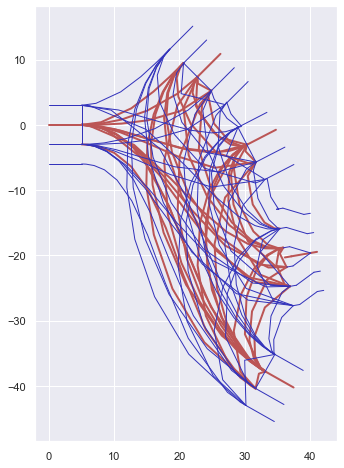

ERROR:shapely.geos:TopologyException: side location conflict at 28.965939173145987 -0.37940627267225491


ValueError: No Shapely geometry can be created from null value

In [20]:
from junctionart.draw.IntersectionDrawer import IntersectionDrawer
intersection = intersections[1269]

extensions.view_road(intersection.odr,os.path.join('..', "C:\\Users\\adhocmaster\\esmini"))

area_dict = IntersectionDrawer(intersection, step=0.1).get_area_values(include_u_turn=False)

# Plotting Metrics

In [ ]:
class StyledMetricsPlotter():

    def __init__(self,
                incidentPath,
                connectionPath,
                intersectionPath
                ) -> None:
        
        path= os.path.join(os.getcwd(), 'analysis/output')

#         date = "randlane/2021-08-21"

#         incidentPath = f"{path}/{date}-incidentRoadDF.csv"
#         connectionPath = f"{path}/{date}-connectionRoadDF.csv"
#         intersectionPath = f"{path}/{date}-intersectionDF.csv"

        self.plotter = MetricsPlotter(incidentPath=incidentPath, connectionPath=connectionPath, intersectionPath=intersectionPath)
    

    def test_Incident_Histo(self):
        self.plotter.plotIncidentHist(subplots=True)

    def test_IncidentDistribution(self):
        self.plotter.plotIncidentDistributions(subplots=True)

    # def test_Incident_Complexity(self):
    #     self.plotter.plotIncidentComplexity(subplots=True)

    def test_Incident_HeatMaps_Complexity(self):
        sns.set_context("talk")
        self.plotter.plotIncidentHeatMapsComplexity()

    def test_Incident_HeatMaps_ComplexityMax(self):
        sns.set_context("talk")
        self.plotter.plotIncidentHeatMapsComplexityMax()


    def test_plotIncidentHeatMapsCurvatureFov(self):
        # sns.set_context("talk")
        self.plotter.plotIncidentHeatMapsCurvatureFov()
    def test_Incident_ComplexityRelation(self):
        self.plotter.plotIncidentComplexityVs()

    
    def test_Connection_Curvature(self):
        # sns.color_palette("Paired")
        sns.set_context("talk")
        self.plotter.plotConnectionPropertyHistGroupedByLegs("turnCurvature")

    def test_Incident_Curvature(self):
        # sns.color_palette("viridis", as_cmap=True)
        sns.set_context("talk")
        self.plotter.plotIncidentPropertyHistGroupedByLegs("maxCurvature")

    def test_Incident_Complexity(self):
        # sns.color_palette("viridis", as_cmap=True)
        sns.set_context("talk")
        self.plotter.plotIncidentPropertyHistGroupedByLegs("complexity_avg")

    def test_Incident_FOV(self):
        # sns.color_palette("viridis", as_cmap=True)
        sns.set_context("talk")
        self.plotter.plotIncidentPropertyHistGroupedByLegs("fov")

    def test_Incident_Deviation(self):
        # sns.color_palette("viridis", as_cmap=True)
        sns.set_context("talk")
        self.plotter.plotIncidentPropertyHistGroupedByLegs("cornerDeviation")

    
    def test_plotIntersectionPropertyHistGroupedByLegs(self):
        sns.set_context("talk")
        self.plotter.plotIntersectionPropertyHist("numberOfIncidentRoads", xlabel="nIncidentRoads", kde=False)
        self.plotter.plotIntersectionPropertyHistGroupedByLegs("numberOfConnectionRoads", xlabel="nConnectionRoads")
        self.plotter.plotIntersectionPropertyHistGroupedByLegs("area")
        self.plotter.plotIntersectionPropertyHistGroupedByLegs("conflictArea")
        self.plotter.plotIntersectionPropertyHistGroupedByLegs("conflictRatio")
        # sns.plotIntersectionPropertyHistGroupedByLegs("conflictArea")

    
    
    def test_plotIntersectionHeatmaps(self):
        # sns.set_context("talk")
        self.plotter.plotIntersectionHeatMaps(scale=10)

    
    def test_printIntersectionHead(self):
        self.plotter.printIntersectionHead()


In [ ]:
%matplotlib inline
prefix = "output/Sequential-intersections-1000/2022-10-08"
plotter = StyledMetricsPlotter(
            incidentPath=f"{prefix}-incidentRoadDF.csv",
            connectionPath=f"{prefix}-connectionRoadDF.csv",
            intersectionPath=f"{prefix}-intersectionDF.csv"
            )




In [ ]:
plotter.test_Incident_Histo()

In [ ]:
plotter.test_IncidentDistribution()

In [ ]:
plotter.test_Incident_HeatMaps_Complexity()